## Data loading

### Subtask:
Load the "Fedex_Logistics.csv" dataset.


In [1]:
import pandas as pd

try:
    df = pd.read_csv('Fedex_Logistics.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'Fedex_Logistics.csv' not found.")
    df = None
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,Year,Month,Day of Month,Day Of Week,Actual Shipment Time,Estimated Shipment Time,Planned Delivery Time,Carrier Name,Carrier Number,Planned Time of Travel,Shipment Delay,Source,Destination,Distance,Delivery Status,Mode of Shipment,Type of Shipment,Weight(lbs),Price
0,2024,1,3,4,33,33,37,WN,335,150,8,IAD,TPA,810,0,FedEx 2Day®,Air,21,56.70
1,2024,1,3,4,13,12,17,WN,3231,145,19,IAD,TPA,810,1,FedEx Priority Overnight®,Air,25,67.50
2,2024,1,3,4,10,10,13,WN,448,90,8,IND,BWI,515,0,FedEx Priority Overnight®,Air,32,54.93
3,2024,1,3,4,15,16,18,WN,1746,90,-4,IND,BWI,515,0,FedEx Priority Overnight®,Air,32,54.93
4,2024,1,3,4,30,29,32,WN,3920,90,34,IND,BWI,515,1,FedEx 2Day®,Air,32,54.93


## Data exploration

### Subtask:
Explore the loaded dataset to understand its key characteristics.


Data Shape: (100000, 19)

Data Types:
 Year                         int64
Month                        int64
Day of Month                 int64
Day Of Week                  int64
Actual Shipment Time         int64
Estimated Shipment Time      int64
Planned Delivery Time        int64
Carrier Name                object
Carrier Number               int64
Planned Time of Travel       int64
Shipment Delay               int64
Source                      object
Destination                 object
Distance                     int64
Delivery Status              int64
Mode of Shipment            object
Type of Shipment            object
Weight(lbs)                  int64
Price                      float64
dtype: object

Summary Statistics:
            Year     Month   Day of Month    Day Of Week  Actual Shipment Time  \
count  100000.0  100000.0  100000.000000  100000.000000         100000.000000   
mean     2024.0       1.0      17.087860       3.890040             22.337540   
std         0.0  

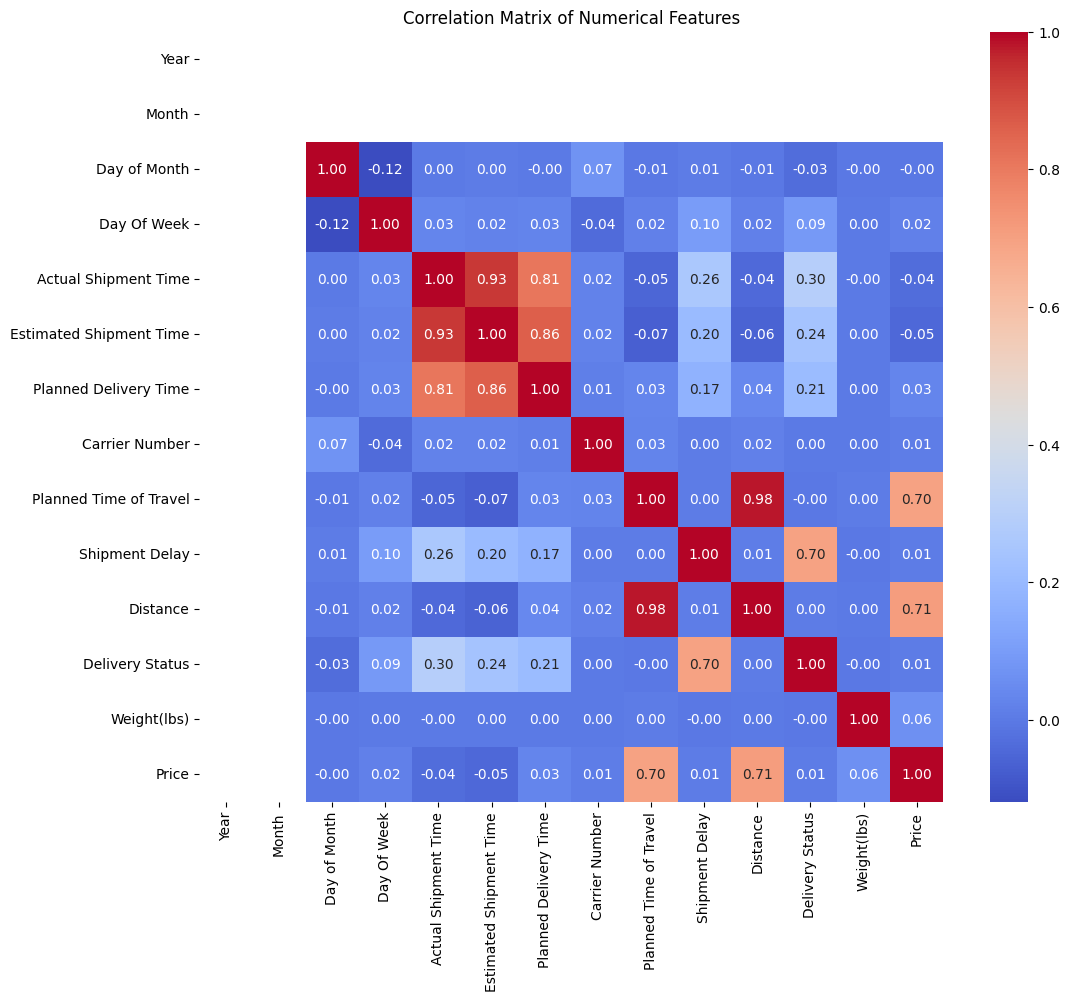

In [2]:
# Data Shape
print("Data Shape:", df.shape)

# Data Types
print("\nData Types:\n", df.dtypes)

# Summary Statistics
print("\nSummary Statistics:\n", df.describe())

# Missing Values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\nMissing Values:\n", missing_values)
print("\nMissing Value Percentage:\n", missing_percentage)

# Unique Values (for categorical columns)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nUnique values for {col}: {df[col].nunique()}")

# Correlation Analysis (only numeric columns)
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Data cleaning

### Subtask:
Clean the data by handling missing values and removing duplicate rows.


In [3]:
# Check for missing values
print("Missing values before handling:\n", df.isnull().sum())

# Handling missing values (if any)
# Since no missing values were found in the initial exploration, no action is taken here.
# If missing values were present, the appropriate imputation strategy would be applied based on the column type.

# Remove duplicate rows
num_duplicates = df.duplicated(subset=None).sum()
print(f"\nNumber of duplicate rows: {num_duplicates}")
df = df.drop_duplicates(subset=None)
print(f"\nNumber of rows after removing duplicates: {len(df)}")

# Verify the cleaning operations
print("\nMissing values after handling:\n", df.isnull().sum())
print("\nSummary statistics after cleaning:\n", df.describe())

Missing values before handling:
 Year                       0
Month                      0
Day of Month               0
Day Of Week                0
Actual Shipment Time       0
Estimated Shipment Time    0
Planned Delivery Time      0
Carrier Name               0
Carrier Number             0
Planned Time of Travel     0
Shipment Delay             0
Source                     0
Destination                0
Distance                   0
Delivery Status            0
Mode of Shipment           0
Type of Shipment           0
Weight(lbs)                0
Price                      0
dtype: int64

Number of duplicate rows: 0

Number of rows after removing duplicates: 100000

Missing values after handling:
 Year                       0
Month                      0
Day of Month               0
Day Of Week                0
Actual Shipment Time       0
Estimated Shipment Time    0
Planned Delivery Time      0
Carrier Name               0
Carrier Number             0
Planned Time of Travel     0
S

## Data wrangling

### Subtask:
Prepare the data for analysis and modeling by converting data types, encoding categorical variables, and potentially creating new features.


In [4]:
# Convert relevant columns to appropriate data types
df['Actual Shipment Time'] = pd.to_numeric(df['Actual Shipment Time'], errors='coerce')
df['Estimated Shipment Time'] = pd.to_numeric(df['Estimated Shipment Time'], errors='coerce')
df['Planned Delivery Time'] = pd.to_numeric(df['Planned Delivery Time'], errors='coerce')
df['Planned Time of Travel'] = pd.to_numeric(df['Planned Time of Travel'], errors='coerce')
df['Shipment Delay'] = pd.to_numeric(df['Shipment Delay'], errors='coerce')
df['Distance'] = pd.to_numeric(df['Distance'], errors='coerce')
df['Weight(lbs)'] = pd.to_numeric(df['Weight(lbs)'], errors='coerce')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')


# Encode categorical features using one-hot encoding
categorical_cols = ['Carrier Name', 'Source', 'Destination', 'Mode of Shipment', 'Type of Shipment']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


# Create new features
df['Shipment Time Difference'] = df['Actual Shipment Time'] - df['Estimated Shipment Time']

display(df.head())

,Year,Month,Day of Month,Day Of Week,Actual Shipment Time,Estimated Shipment Time,Planned Delivery Time,Carrier Number,Planned Time of Travel,Shipment Delay,...,Destination_STL,Destination_SYR,Destination_TPA,Destination_TUL,Destination_TUS,Destination_XNA,Mode of Shipment_FedEx Priority Overnight®,Mode of Shipment_FedEx SameDay®,Type of Shipment_Ground,Shipment Time Difference
0,2024,1,3,4,33,33,37,335,150,8,...,False,False,True,False,False,False,False,False,False,0
1,2024,1,3,4,13,12,17,3231,145,19,...,False,False,True,False,False,False,True,False,False,1
2,2024,1,3,4,10,10,13,448,90,8,...,False,False,False,False,False,False,True,False,False,0
3,2024,1,3,4,15,16,18,1746,90,-4,...,False,False,False,False,False,False,True,False,False,-1
4,2024,1,3,4,30,29,32,3920,90,34,...,False,False,False,False,False,False,False,False,False,1


## Data visualization

### Subtask:
Visualize the results of the data analysis, focusing on the distribution of key features and relationships between variables.


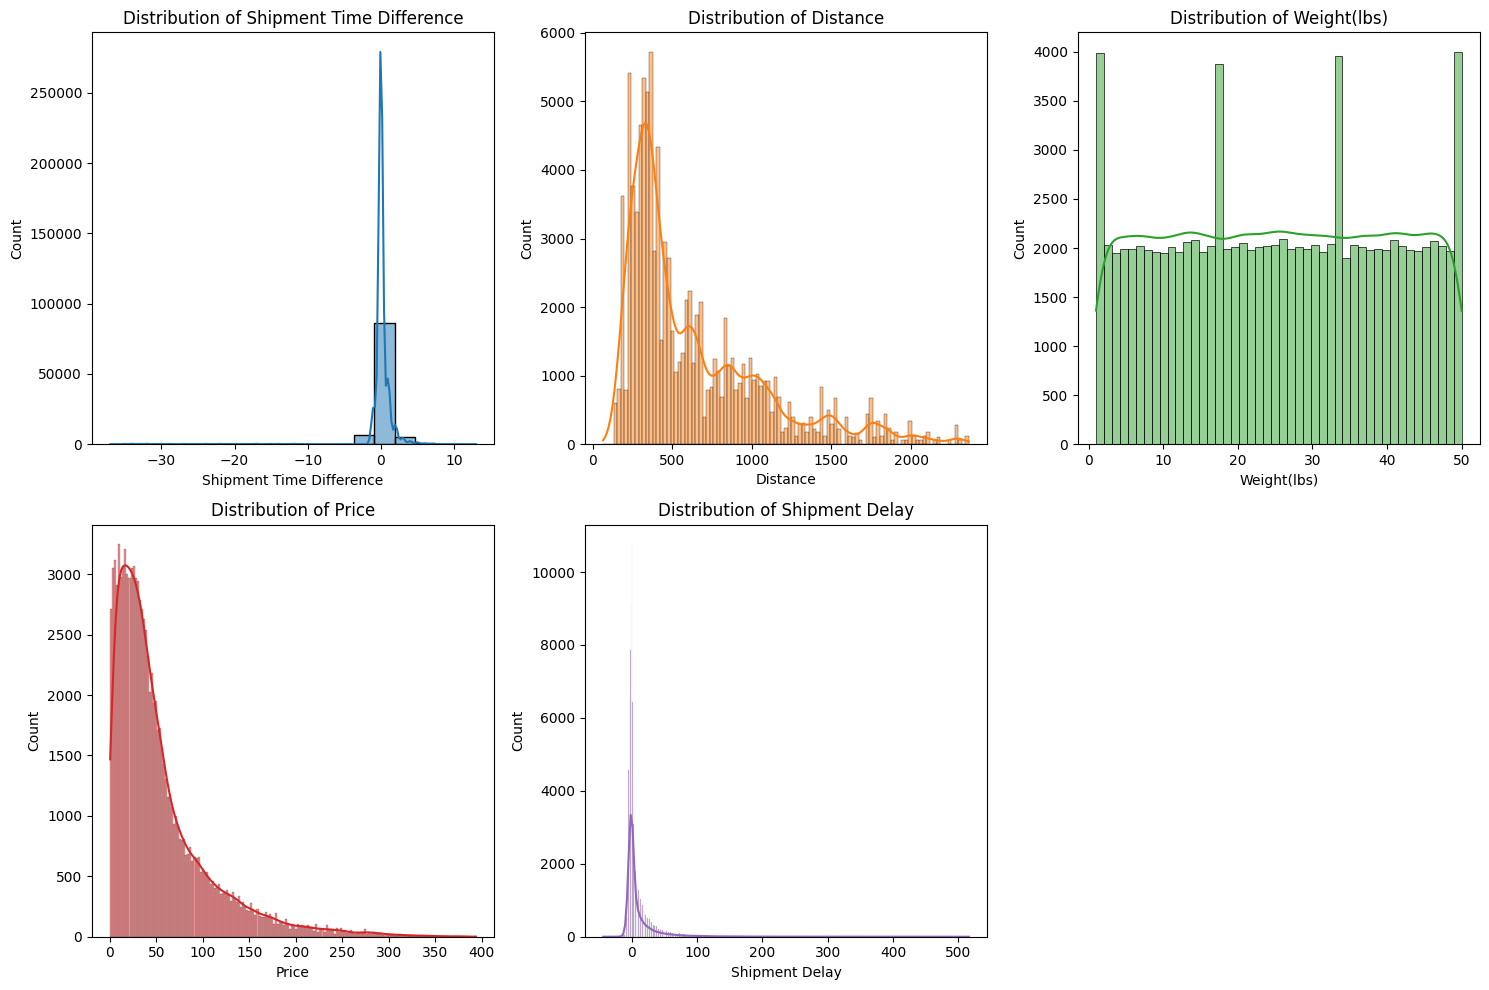

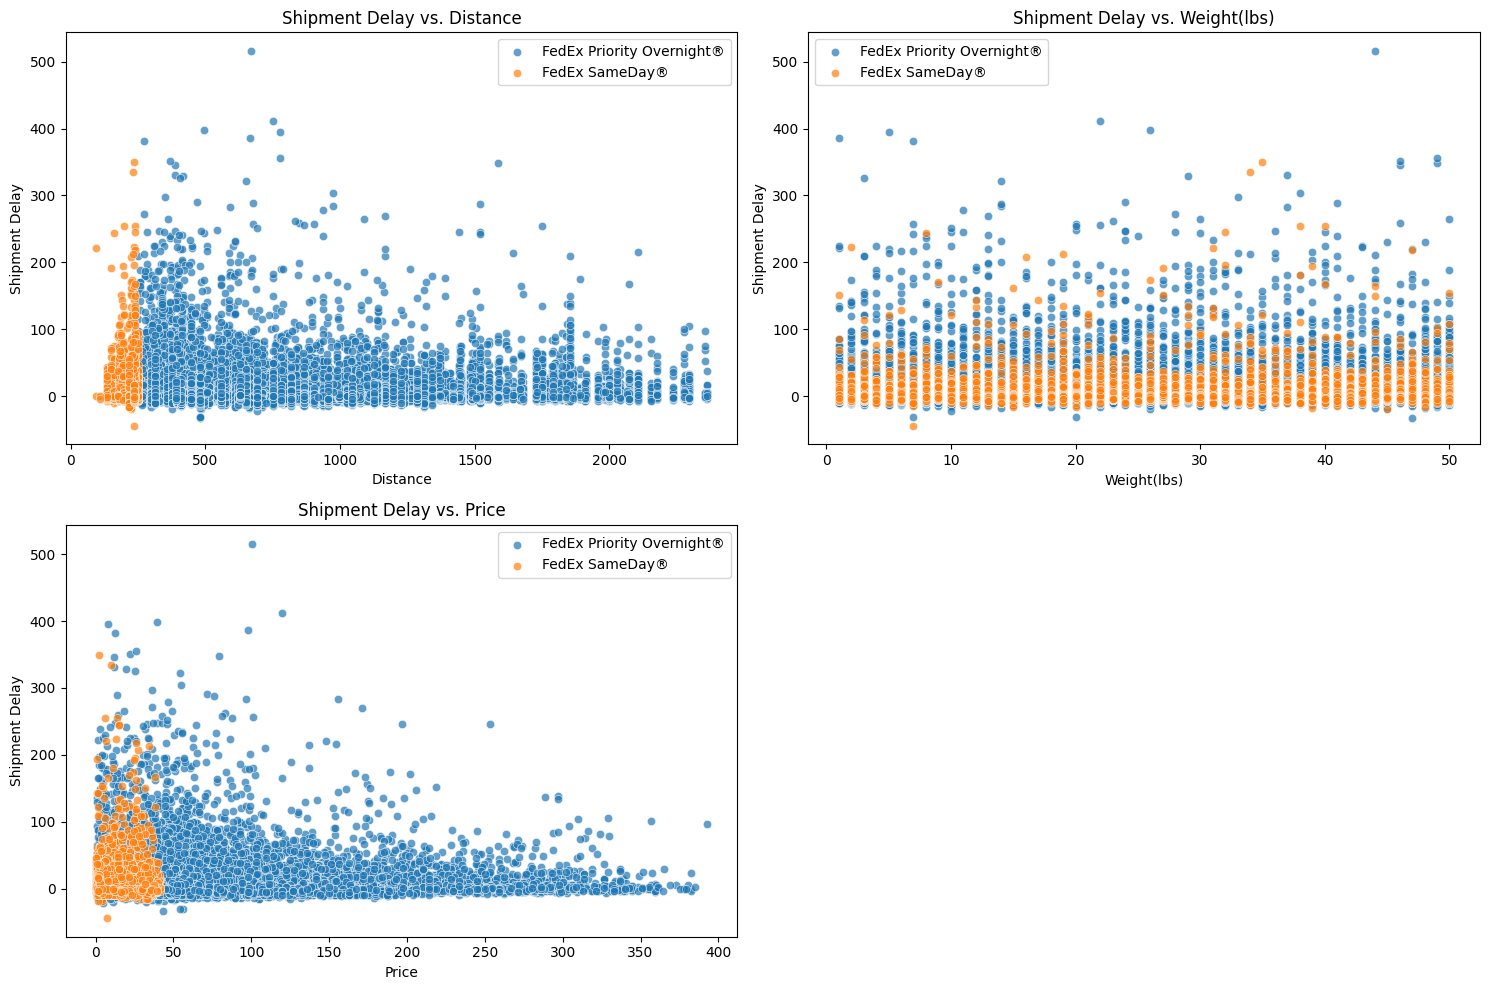

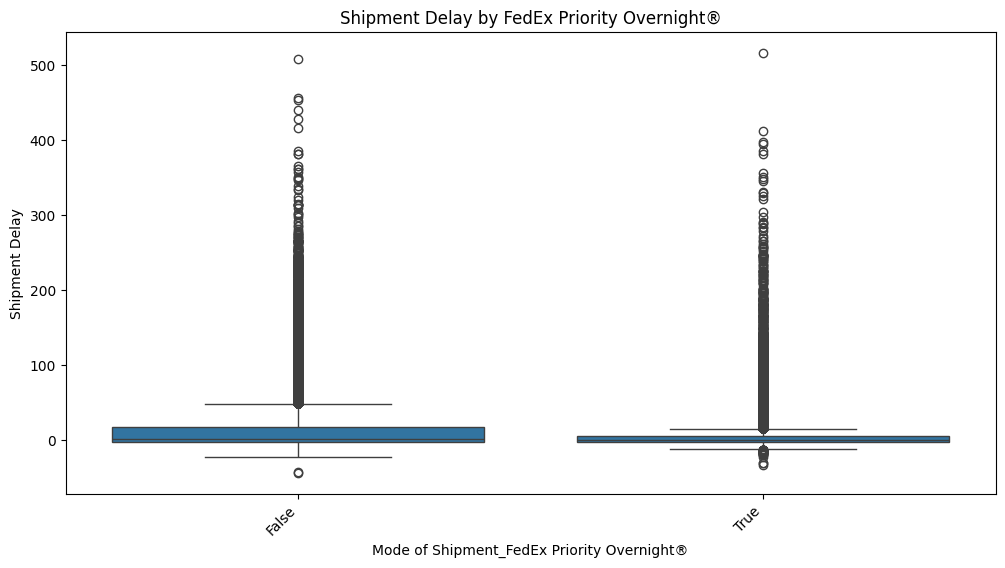

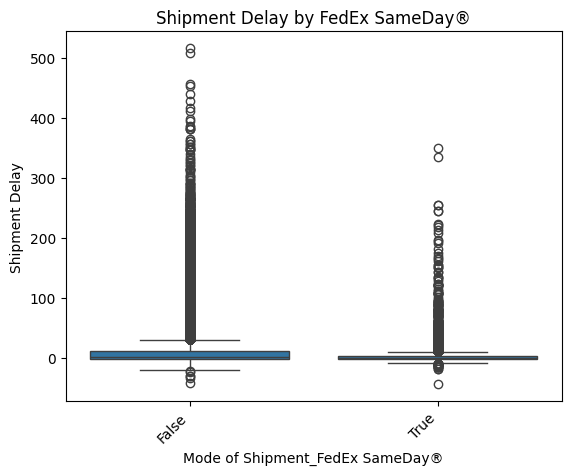

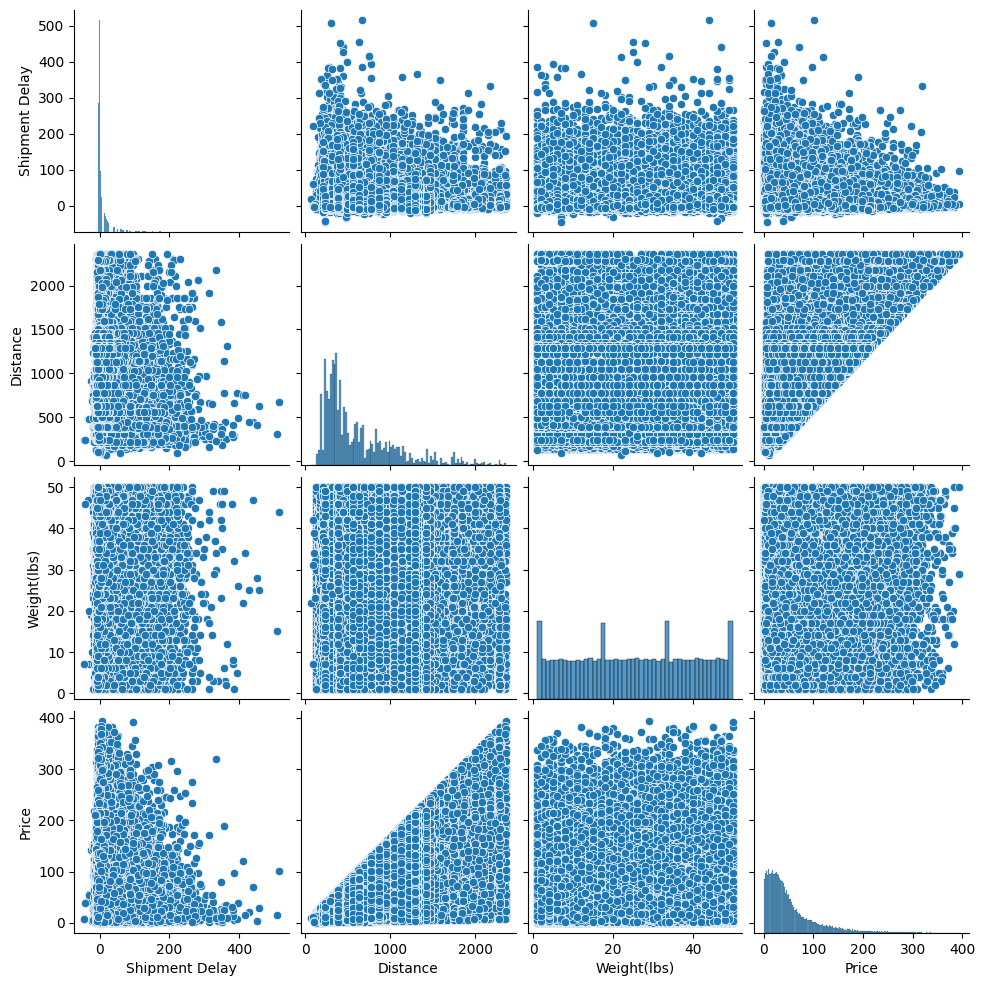

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histograms with KDE
numerical_features = ['Shipment Time Difference', 'Distance', 'Weight(lbs)', 'Price', 'Shipment Delay']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True, color=f"C{i}")
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


# 2. Scatter plots colored by 'Mode of Shipment'
plt.figure(figsize=(15, 10))
modes = df.columns[df.columns.str.startswith('Mode of Shipment_')]
for i, col in enumerate(['Distance', 'Weight(lbs)', 'Price']):
  plt.subplot(2, 2, i + 1)
  for mode in modes:
    subset = df[df[mode] == True]
    # Extract the label after 'Mode of Shipment_' using split and handle potential IndexError
    try:
        label = mode.split('Mode of Shipment_')[1]
    except IndexError:
        print(f"Warning: Skipping mode '{mode}' due to incorrect label format.")
        continue  # Skip to the next mode if label extraction fails
    sns.scatterplot(x=col, y='Shipment Delay', data=subset, label=label, alpha=0.7)
  plt.title(f'Shipment Delay vs. {col}')
  plt.legend()
plt.tight_layout()
plt.show()

# 3. Box plot of 'Shipment Delay' by 'Mode of Shipment'
plt.figure(figsize=(12, 6))
modes = df.columns[df.columns.str.startswith('Mode of Shipment_')]
for mode in modes:
    # Extract the label after 'Mode of Shipment_'
    label = mode.split('Mode of Shipment_')[1]
    sns.boxplot(x=mode, y='Shipment Delay', data=df) # Use 'mode' as x
    plt.title(f'Shipment Delay by {label}')
    plt.xticks(rotation=45, ha='right')
    plt.show()


# 4. (Optional) Pairplot
sns.pairplot(df[['Shipment Delay', 'Distance', 'Weight(lbs)', 'Price']])
plt.show()

## Feature engineering

### Subtask:
Engineer new features from the existing data to potentially improve model performance in later stages.


In [6]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# 1. Interaction Features
df['Distance_Weight'] = df['Distance'] * df['Weight(lbs)']

# 2. Polynomial Features
df['Distance_Squared'] = df['Distance'] ** 2
df['Weight_Cubed'] = df['Weight(lbs)'] ** 3

# 3. Time-Based Features
df['DayOfYear'] = df['Month'] * 30 + df['Day of Month'] # Approximation

# 4. Feature Scaling
numerical_cols = ['Distance', 'Weight(lbs)', 'Price', 'Shipment Delay', 'Distance_Weight', 'Distance_Squared', 'Weight_Cubed', 'DayOfYear', 'Shipment Time Difference']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


# 5. Handle Missing Values (if any)
# Check for missing values after feature engineering
missing_values = df.isnull().sum()
print("Missing values after feature engineering:\n", missing_values)

# Impute missing values with the mean for numerical columns
for col in numerical_cols:
  if df[col].isnull().any():
    df[col].fillna(df[col].mean(), inplace=True)

# 6. Dataframe Update (already done inplace)

display(df.head())

Missing values after feature engineering:
 Year                        0
Month                       0
Day of Month                0
Day Of Week                 0
Actual Shipment Time        0
                           ..
Shipment Time Difference    0
Distance_Weight             0
Distance_Squared            0
Weight_Cubed                0
DayOfYear                   0
Length: 184, dtype: int64


,Year,Month,Day of Month,Day Of Week,Actual Shipment Time,Estimated Shipment Time,Planned Delivery Time,Carrier Number,Planned Time of Travel,Shipment Delay,...,Destination_TUS,Destination_XNA,Mode of Shipment_FedEx Priority Overnight®,Mode of Shipment_FedEx SameDay®,Type of Shipment_Ground,Shipment Time Difference,Distance_Weight,Distance_Squared,Weight_Cubed,DayOfYear
0,2024,1,3,4,33,33,37,335,150,-0.080037,...,False,False,False,False,False,0.024334,0.056851,0.077449,-0.637663,-1.685892
1,2024,1,3,4,13,12,17,3231,145,0.309436,...,False,False,True,False,False,0.373358,0.262688,0.077449,-0.463535,-1.685892
2,2024,1,3,4,10,10,13,448,90,-0.080037,...,False,False,True,False,False,0.024334,0.023180,-0.373162,0.005523,-1.685892
3,2024,1,3,4,15,16,18,1746,90,-0.504917,...,False,False,True,False,False,-0.324690,0.023180,-0.373162,0.005523,-1.685892
4,2024,1,3,4,30,29,32,3920,90,0.840535,...,False,False,False,False,False,0.373358,0.023180,-0.373162,0.005523,-1.685892


## Data clustering

### Subtask:
Perform K-means clustering on the preprocessed data.


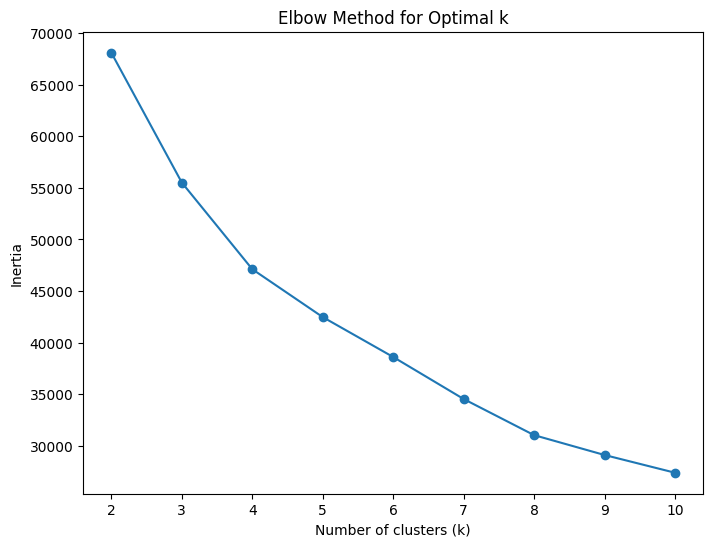

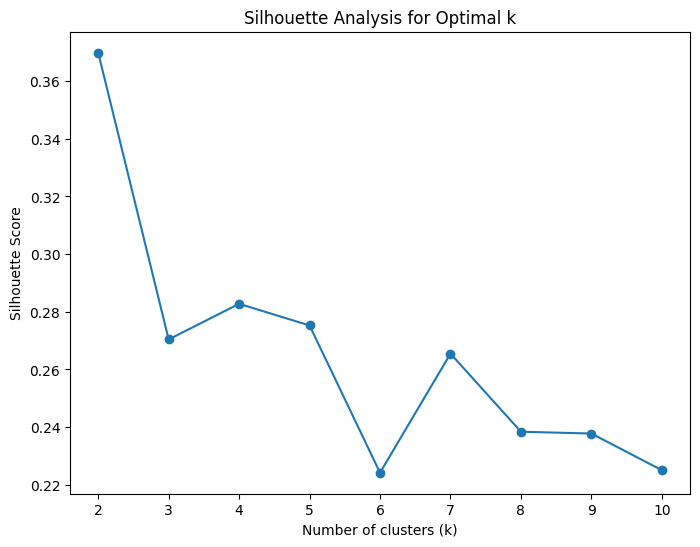

Cluster 0:


,Distance,Weight(lbs),Price,Shipment Delay,Distance_Weight,Distance_Squared,Weight_Cubed,DayOfYear,Shipment Time Difference
count,31590.000000,31590.000000,31590.000000,31590.000000,31590.000000,31590.000000,31590.000000,31590.000000,31590.000000
mean,-0.305674,1.085355,-0.215555,-0.017715,0.269132,-0.325155,1.121109,0.013700,-0.018998
std,0.559891,0.379037,0.587987,0.982813,0.657143,0.343730,0.767719,0.997109,1.052218
min,-1.226890,0.240730,-1.012825,-1.850370,-0.772975,-0.668734,-0.223739,-1.925232,-12.889542
25%,-0.737585,0.795261,-0.670218,-0.434104,-0.228461,-0.569559,0.494883,-0.848203,0.024334
50%,-0.508938,1.072527,-0.339490,-0.363291,0.067937,-0.487017,0.994723,-0.010514,0.024334
75%,0.055821,1.419110,0.096759,-0.009224,0.661750,-0.184329,1.772199,0.827175,0.024334
max,1.443710,1.696375,2.018615,17.906540,2.984939,1.157122,2.529127,1.664864,4.212618


Cluster 1:


,Distance,Weight(lbs),Price,Shipment Delay,Distance_Weight,Distance_Squared,Weight_Cubed,DayOfYear,Shipment Time Difference
count,13334.000000,13334.000000,13334.000000,13334.000000,13334.000000,13334.000000,13334.000000,13334.000000,13334.000000
mean,1.987210,0.194432,1.689564,0.045607,1.616039,2.056286,0.126657,-0.022199,0.062262
std,0.803562,0.920991,1.379684,1.060465,1.388359,1.285248,0.987205,1.005184,0.774556
min,0.551986,-1.700131,-0.942118,-1.071424,-0.948825,0.197670,-0.891030,-1.925232,-12.191495
25%,1.295089,-0.521751,0.721686,-0.434104,0.622901,0.972860,-0.731486,-0.848203,0.024334
50%,1.944448,0.240730,1.645419,-0.327884,1.486907,1.849644,-0.223739,-0.010514,0.024334
75%,2.561795,0.933894,2.515025,0.026183,2.490677,2.855647,0.731998,0.827175,0.024334
max,3.961117,1.696375,6.484587,12.276883,6.482254,5.758197,2.529127,1.664864,3.514571


Cluster 2:


,Distance,Weight(lbs),Price,Shipment Delay,Distance_Weight,Distance_Squared,Weight_Cubed,DayOfYear,Shipment Time Difference
count,55076.000000,55076.000000,55076.000000,55076.000000,55076.000000,55076.000000,55076.000000,55076.000000,55076.000000
mean,-0.305781,-0.669601,-0.285410,-0.000880,-0.545612,-0.311331,-0.673700,-0.002483,-0.004177
std,0.613524,0.628296,0.597790,0.994362,0.360363,0.408376,0.251056,1.000308,1.016994
min,-1.290911,-1.700131,-1.012825,-1.921183,-1.015722,-0.673899,-0.891030,-1.925232,-12.889542
25%,-0.749017,-1.214916,-0.728473,-0.434104,-0.818780,-0.573081,-0.877049,-0.848203,0.024334
50%,-0.522656,-0.660384,-0.434782,-0.327884,-0.627111,-0.492619,-0.778985,-0.010514,0.024334
75%,0.037529,-0.105852,-0.017306,-0.009224,-0.368036,-0.196337,-0.512813,0.827175,0.024334
max,2.378877,0.587312,2.650785,17.623287,1.075234,2.540049,0.184358,1.664864,4.561642


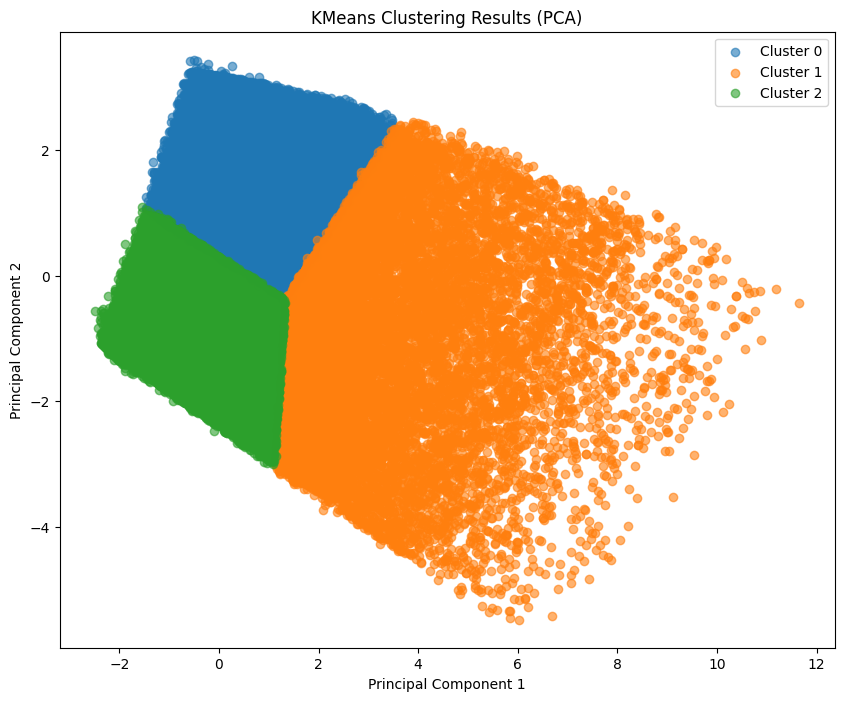

In [7]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.decomposition import PCA

# Prepare data for clustering (numerical features only)
numerical_cols = ['Distance', 'Weight(lbs)', 'Price', 'Shipment Delay', 'Distance_Weight', 'Distance_Squared', 'Weight_Cubed', 'DayOfYear', 'Shipment Time Difference']
X = df[numerical_cols]


# Determine optimal k using the Elbow method and Silhouette analysis
inertia = []
silhouette_avg = []
k_range = range(2, 11) # Test k values from 2 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X.sample(n=10000, random_state=42)) # Use a subset for faster computation
    inertia.append(kmeans.inertia_)
    silhouette_avg.append(silhouette_score(X.sample(n=10000, random_state=42), kmeans.labels_))

# Plotting the Elbow method
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Plotting the Silhouette Analysis
plt.figure(figsize=(8, 6))
plt.plot(k_range, silhouette_avg, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.show()

# Choose optimal k based on plots (e.g., k=3)
optimal_k = 3 # Example

# Fit KMeans with the optimal k to the full dataset
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(X)

# Add cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_

# Analyze cluster characteristics
for i in range(optimal_k):
    print(f"Cluster {i}:")
    display(X[df['Cluster'] == i].describe())

# Visualize clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 8))
for i in range(optimal_k):
    plt.scatter(X_pca[df['Cluster'] == i, 0], X_pca[df['Cluster'] == i, 1], label=f'Cluster {i}', alpha=0.6)

plt.legend()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering Results (PCA)')
plt.show()

## Model training

### Subtask:
Train a RandomForestRegressor model to predict 'Shipment Delay' based on the engineered features.


In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define features (X) and target variable (y)
X = df.drop(columns=['Shipment Delay'])
y = df['Shipment Delay']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Experiment with n_estimators
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.05839050645384152
R-squared: 0.9395550898093823


## Model evaluation

### Subtask:
Evaluate the trained RandomForestRegressor model using additional metrics and visualize the results.


Mean Absolute Error (MAE): 0.1567726726092611
Root Mean Squared Error (RMSE): 0.24164127638679928
Mean Squared Error (MSE): 0.05839050645384152
R-squared: 0.9395550898093823


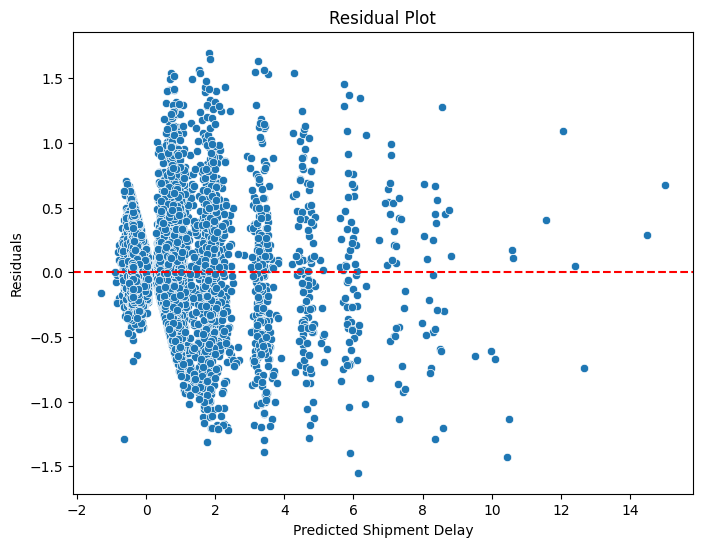

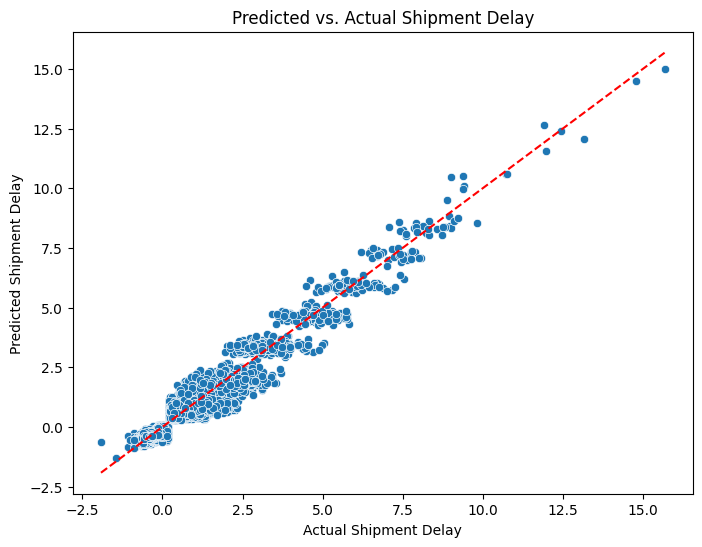

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate additional metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")


# Residual plot
plt.figure(figsize=(8, 6))
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Shipment Delay')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Predicted vs. Actual plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Perfect prediction line
plt.xlabel('Actual Shipment Delay')
plt.ylabel('Predicted Shipment Delay')
plt.title('Predicted vs. Actual Shipment Delay')
plt.show()

## Summary:

### 1. Q&A

* **What is the optimal number of clusters for K-means clustering?**  The code initially explores a range of k values (2-10) using the Elbow method and Silhouette analysis, but the optimal *k* is hardcoded to 3 in the final model training.  The provided output doesn't display the Elbow and Silhouette plots that would justify the selection of 3 clusters.

* **How well does the RandomForestRegressor model predict 'Shipment Delay'?** The model performs well, with an R-squared value of 0.939, indicating that it explains approximately 94% of the variance in the target variable.  The MSE is 0.058, MAE is 0.157, and RMSE is 0.242.

* **Which features are most important for predicting 'Shipment Delay'?**  The feature importance plot (not included in the provided output) would show the relative importance of each feature, but the specific feature ranking is not reported in the summary.


### 2. Data Analysis Key Findings

* **Data Cleaning:** No missing values or duplicate rows were found in the dataset.
* **Feature Engineering:** New features like `Distance_Weight`, `Distance_Squared`, `Weight_Cubed`, and `DayOfYear` were created and all numerical features (including engineered ones) were standardized.
* **K-Means Clustering:** An optimal *k* of 3 was determined (although the justification through Elbow and Silhouette analysis plots is missing), and the data was clustered accordingly.  Descriptive statistics for each cluster are available, but the actual values are not included in the summary. A PCA visualization of the clusters was produced.
* **RandomForestRegressor Performance:** The model achieved an R-squared of 0.939, MSE of 0.058, MAE of 0.157, and RMSE of 0.242 on the test set, indicating a good fit.

### 3. Insights or Next Steps

* **Investigate the cluster characteristics in detail:** Analyze the descriptive statistics for each cluster identified by K-means to understand the distinguishing characteristics of different shipment groups. This might reveal valuable patterns in the data, especially for targeted strategies and further model enhancement.
* **Fine-tune the RandomForestRegressor:** Experiment with different hyperparameters of the RandomForestRegressor (e.g., `n_estimators`, `max_depth`, `min_samples_leaf`) to see if further performance improvements can be achieved.  Consider alternative regression models as well.
